# S09 T01: Practicant amb training i test sets

**Objectius:**
 * Preprocesament
 * Transformació
 * Dummy Variable
 * Train i Test

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Although simple to use and interpret, there are times when the procedure should **not be used**, 
 - such as when you have a small dataset and situations where additional configuration is required, 
 - such as when it is used for classification and the dataset is not balanced.

## Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In this exercise we will prepare the dataset for the machine learning models required in the next exercise.

### Step 1 - Loading the required libraries and modules.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 - Reading the Data and Performing Basic Data Checks

In [66]:
df = pd.read_csv ('DelayedFlights.csv', index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [67]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Step 3 - Identify Anomalies/ Missing Data

In [68]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

First we need to understand the data/columns meaning.

[AOTP]: https://catsr.vse.gmu.edu/SYST660/BigDataAnalysisInAviation_AOTP.pdf
**Airline On-Time Performance ([AOTP])**

[data definition]: https://www.stat.purdue.edu/~lfindsen/stat350/airline2008_dataset_definition.pdf
The flight [data definition]:
 * *UniqueCarrier*: Unique carrier code
 * *FlightNum*: Flight Number
 * *Origin*: origin IATA airport code
 * *Dest*: destination IATA airport code
 * *CRSDepTime*: Schedule Departure (local, hhmm)
 * *CRSArrTime*: Schedule Arrival (local, hhmm)
 * *DepTime*: Actual Departure Time (local, hhmm)
 * *ArrTime*: Actual Arrival Time. Early arrivals show negative numbers (local, hhmm)
 * *CRSElapsedTime*: Schedule Elapsed Time, where elapsed time is "The time computed from gate departure time to gate arrival time." (minutes)
 * *ActualElapsedTime*: Actual Elapsed Time (minutes)
 * *AirTime*: The total time an aircraft is in the air between an origin-destination airport pair, i.e. from wheels-off at the origin airport to wheels-on at the destination airport. (minutes)
 * *ArrDelay*: Difference in Minutes Between Actual Arrival Time and CRS Scheduled Arrival Time (minutes)
 * *DepDelay*: Difference in Minutes Between Actual Departure Time and CRS Scheduled Departure Time (minutes)
 * *TaxiIn*: Wheels down and arrival at the destination airport gate (minutes)
 * *TaxiOut*: The time elapsed between departure from the origin airport gate and wheels off (minutes)
 * *Cancelled*: was the flight cancelled? 1 = yes, 0 = no
 * *CancellationCode*: reason for cancellation 
     * A-Carrier Caused
     * B-Weather
     * C-National Aviation System (NAS)
     * D-Security
 * *Diverted*: was the flight diverted? 1 = yes, 0 = no

[link info]: https://www.bts.gov/explore-topics-and-geography/topics/airline-time-performance-and-causes-flight-delays
The airlines report the causes of delays in five broad categories [link info]:

 * **Air Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
 * **Extreme Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
 * **National Aviation System (NAS):** Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
 * **Late-arriving aircraft:** A previous flight with same aircraft arrived late, causing the present flight to depart late.
 * **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

**A flight will be late if a flight is arriving or departing 15 minutes or more after the scheduled time.**

This is a large dataset we we try to prepare it as required for the models and remove un-necessari information. Therefore we remove flight number and tail number as they don't have relevant information.

In [69]:
df = df.drop(['FlightNum', 'TailNum'], axis=1)

In [70]:
df.isnull().sum()[df.isnull().sum() > 0]

ArrTime                7110
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
TaxiIn                 7110
TaxiOut                 455
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [71]:
#Replane NaN by 0 in the delay columns.
df.fillna(value = {'CarrierDelay': 0,'WeatherDelay': 0, 'NASDelay': 0, 'SecurityDelay': 0, 'LateAircraftDelay': 0}, inplace=True)

In [72]:
#Let's fill the ActualElapsedTime nulls with the mean of the flights with the same Origin and Destination.
df['ActualElapsedTime'] = df.groupby(['Origin', 'Dest'])['ActualElapsedTime'].transform(lambda x: x.fillna(x.mean()))

In [73]:
df.isnull().sum()[df.isnull().sum() > 0]

ArrTime              7110
ActualElapsedTime      94
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
TaxiIn               7110
TaxiOut               455
dtype: int64

It seems that some nulls remain, I print the table to try to find out which may be the reason

In [74]:
df[df['ActualElapsedTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
94778,2008,1,29,2,2236.0,2136,NaN,2156,XE,NaN,...,NaN,9.0,0,N,1,0.0,0.0,0.0,0.0,0.0
96148,2008,1,5,6,1714.0,1655,NaN,1712,XE,NaN,...,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
174761,2008,1,4,5,1556.0,1031,NaN,1134,OO,NaN,...,NaN,37.0,0,N,1,0.0,0.0,0.0,0.0,0.0
175095,2008,1,4,5,550.0,540,NaN,646,OO,NaN,...,NaN,29.0,0,N,1,0.0,0.0,0.0,0.0,0.0
175467,2008,1,4,5,747.0,738,NaN,914,OO,NaN,...,NaN,27.0,0,N,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103340,2008,11,18,2,2321.0,2140,NaN,2200,OO,NaN,...,NaN,8.0,0,N,1,0.0,0.0,0.0,0.0,0.0
6620556,2008,12,22,1,1405.0,1304,NaN,1345,OO,NaN,...,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
6635707,2008,12,9,2,2255.0,2240,NaN,2310,OO,NaN,...,NaN,12.0,0,N,1,0.0,0.0,0.0,0.0,0.0
6650990,2008,12,1,1,2049.0,2039,NaN,2104,OO,NaN,...,NaN,8.0,0,N,1,0.0,0.0,0.0,0.0,0.0


The print seems to show that the nulls remain because the flights were Diverted. Let's check if the 94 remaining nulls are from Diverted flights

In [75]:
df['Diverted'][(df['ActualElapsedTime'].isnull()) & (df['Diverted']==1)].sum()

94

It's confirmed that the 94 nulls remaining in the ActualElapsedTime are do Diverted flights. I decide not to modify this nan and leave them as they are.

The ArrTime can be calculated as _ArrTime = DepTime + ActualElapsedTime_

The other values with more than 1000nulls are _AirTime_, _TaxiIn_ and _ArrDelay_.

AirTime and TaxiIn are related with ActualElapsedTime as _ActualElapsedTime = TaxiOut + AirTime + TaxiIn_

For TaxiIn and TaxiOut we'll calculate the mean using flights with the same Origin and Destination as we did with the ActualElapsedTime.

Then with the formula we calculate the AirTime missing values.

In [76]:
def hour_in_min(hour):
   h_in_min = (np.floor(hour/100)*60) + (hour - (np.floor(hour/100)*100))
   return h_in_min

def min_to_hour(min):
   min_to_h = (np.floor(min/60)*100) + (min - (np.floor(min/60)*60))
   return min_to_h

In [77]:
df['ArrTime'] = min_to_hour((hour_in_min(df['DepTime'])) + (df['ActualElapsedTime']))

In [78]:
df['TaxiIn'] = df.groupby(['Origin', 'Dest'])['TaxiIn'].transform(lambda x: x.fillna(x.mean()))
df['TaxiOut'] = df.groupby(['Origin', 'Dest'])['TaxiOut'].transform(lambda x: x.fillna(x.mean()))
df['AirTime'] = (df['ActualElapsedTime']) - (df['TaxiOut']) - (df['TaxiIn'])

Finally ArrDelay can be calculated as ArrDelay = CRSArrTime - ArrTime

In [79]:
df['ArrDelay'] = hour_in_min(df['ArrTime']) - hour_in_min(df['CRSArrTime'])

In [80]:
df.isnull().sum()[df.isnull().sum()>0]

ArrTime               94
ActualElapsedTime     94
CRSElapsedTime       198
AirTime               94
ArrDelay              94
TaxiIn                94
dtype: int64

CRSElapsedTime can be calculated as the difference on the CRSArrTime - CRSDepTime, after convertime the time to min

In [81]:
df['CRSElapsedTime'] = hour_in_min(df['CRSArrTime']) - hour_in_min(df['CRSDepTime'])


The 94 NaN values of the above variables are due to the diverted flight.

I decide to remove the diverted flights from the DataFrame as it´s only a small numbre of them and we will not have to analize this variable in the next exercise.

In [82]:
df = df.dropna()

In [83]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [84]:
df.shape

(1936664, 27)

We save the dataframe with the data cleaned but not prepared (Dummy Var, Normalize or Standarize)

In [85]:
df_sample_data_cleaned = df.sample(n = 20000)
df_sample_data_cleaned.to_csv('DelayFlightsNOPreparedDataSample.csv', index=False)
df_sample_data_cleaned.shape

(20000, 27)

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16

### Step 4 - Creating the Training and Test Datasets

Normally the train-test split will be done after the preparation of the data required in the exercise 2, but as there is no model to be completed in this S09T01 we will do it here as required by the exercise 1.

I check if the targer variable ArrDelay is stratified or not

In [86]:
df.ArrDelay.value_counts()

 10.000000     20978
 8.000000      20887
 7.000000      20838
 9.000000      20825
 6.000000      20721
               ...  
-72.515091         1
-116.702165        1
 214.555556        1
-117.172851        1
 44.805276         1
Name: ArrDelay, Length: 10740, dtype: int64

In [87]:
df['ArrDelay'][df['ArrDelay'] > 0].count()

1494117

There are 10740 different solutions and most of if is higher than 0, therefore the values are not stratified.

In [88]:
from sklearn.model_selection import train_test_split

#The target variable is ArrDelay 
X = df.drop(['ArrDelay'], axis=1).values
y = df.ArrDelay.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1297564, 26) (639100, 26) (1297564,) (639100,)


In [89]:
X

array([[2008, 1, 3, ..., 0.0, 0.0, 0.0],
       [2008, 1, 3, ..., 0.0, 0.0, 0.0],
       [2008, 1, 3, ..., 0.0, 0.0, 0.0],
       ...,
       [2008, 12, 13, ..., 19.0, 0.0, 79.0],
       [2008, 12, 13, ..., 0.0, 0.0, 0.0],
       [2008, 12, 13, ..., 0.0, 0.0, 0.0]], dtype=object)

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Data Preparation

We create convert all categorical variables to numerical using dummy variables. This will create a lot of columns due to the high number of unique carriers and origin/destinations airports.

In [90]:
df2 = pd.get_dummies(df)

In [91]:
df2.shape

(1936664, 652)

In [92]:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime',
       ...
       'Dest_WRG', 'Dest_WYS', 'Dest_XNA', 'Dest_YAK', 'Dest_YKM', 'Dest_YUM',
       'CancellationCode_A', 'CancellationCode_B', 'CancellationCode_C',
       'CancellationCode_N'],
      dtype='object', length=652)

**When to Normalize and Standardize**

Standardization is a scaling technique that assumes your data conforms to a normal distribution.

If a given data attribute is normal or close to normal, this is probably the scaling method to use.

It is good practice to record the summary statistics used in the standardization process, so that you can apply them when standardizing data in the future that you may want to use with your model.

Normalization is a scaling technique that does not assume any specific distribution.

If your data is not normally distributed, consider normalizing it prior to applying your machine learning algorithm.

It is good practice to record the minimum and maximum values for each column used in the normalization process, again, in case you need to normalize new data in the future to be used with your model.

Typically standardization is preferred to min-max normalization. However, there are some applications where min-max scaling would be preferable:
 * Neural networks often require their inputs to be bounded between 0 and 1.
 * In images, for example, where pixels can only take on a specific range of RGB values, data may have to be normalized.
 
For this exercise let´s use both scaling methods with some variables to practice.

If we try to standarize df2 will provide a Memory Error as the laptop run out of RAM. Colab had a similar issue. Therefore we select some variables to be standarized

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
df2[['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut']].describe()

,ArrDelay,DepDelay,TaxiIn,TaxiOut
count,1.936664e+06,1.936664e+06,1.936664e+06,1.936664e+06
mean,6.408821e+01,4.318389e+01,6.814408e+00,1.823248e+01
std,2.136349e+02,5.340099e+01,5.266464e+00,1.433689e+01
min,-1.404000e+03,6.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.200000e+01,4.000000e+00,1.000000e+01
50%,3.100000e+01,2.400000e+01,6.000000e+00,1.400000e+01
75%,8.800000e+01,5.300000e+01,8.000000e+00,2.100000e+01
max,1.938000e+03,2.467000e+03,2.400000e+02,4.220000e+02


In [95]:
ss = StandardScaler()
df2[['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut']] = ss.fit_transform(df2[['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut']])
df2[['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut']]

,ArrDelay,DepDelay,TaxiIn,TaxiOut
0,-0.365522,-0.658862,-0.534402,-0.713717
1,-0.290628,-0.452874,-0.344521,-0.574217
2,-0.234457,-0.658862,-0.724283,-0.085966
4,-0.140839,-0.171980,-0.724283,-0.574217
5,-0.248500,-0.340516,-0.534402,-0.574217
...,...,...,...,...
7009710,-0.463820,-0.246885,0.415002,-0.016215
7009717,0.051077,0.258724,1.554286,1.099787
7009718,0.444271,0.689428,0.225121,0.960287
7009726,-0.257862,-0.602684,1.174525,-0.364966


We could also normalize the features using MixMaxScale

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
df2[['Distance']].describe()

,Distance
count,1.936664e+06
mean,7.656968e+02
std,5.744854e+02
min,1.100000e+01
25%,3.380000e+02
50%,6.060000e+02
75%,9.980000e+02
max,4.962000e+03


In [98]:
mms = MinMaxScaler()
df2['Distance'] = mms.fit_transform(df2['Distance'].values.reshape(-1,1))
df2[['Distance']]

,Distance
0,0.161382
1,0.161382
2,0.101798
4,0.101798
5,0.136740
...,...
7009710,0.180772
7009717,0.094930
7009718,0.136942
7009726,0.105433


In [99]:
df2.shape

(1936664, 652)

In [101]:
# We have a very large DF so we will take a sample of it and save is a a CSV file for the next exercise.
df_sample = df2.sample(n = 20000)
df_sample.to_csv('DelayFlightsPreparedDataSample_NO_PCA.csv', index=False)

Finally we apply Principal Component Analysis (PCA) to reduce the large number of columns

In [100]:
from sklearn.decomposition import PCA

Now that we have prepare the data for a model we can split the data correctly.

In [102]:
#The target variable is ArrDelay 
X = df_sample.drop(['ArrDelay'], axis=1).values
y = df_sample.ArrDelay.values

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train_sample.shape, X_test_sample.shape, y_train_sample.shape, y_test_sample.shape)

(13400, 651) (6600, 651) (13400,) (6600,)


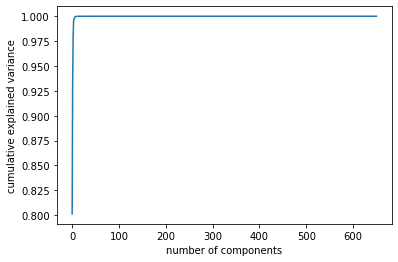

In [103]:
pca = PCA().fit(X_train_sample) # Note that only the X_train is fitted
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In the above graph we can see that very few components are relevant, so by doing a PCA we will reduce considerably the number of features

In [104]:
pca = PCA(.99) #Normally 95% would already be a good value for the variance, but in this case we case push it to 99% of the variance
pca.fit(X_train_sample)
X_train_sample = pca.transform(X_train_sample)
X_test_sample = pca.transform(X_test_sample)
print ('We have {} features which have been reduced using PCA to {} maintaining the 99% of the variance'.format(len(X[1,:]), pca.n_components_))

We have 651 features which have been reduced using PCA to 4 maintaining the 99% of the variance


Now the data would be ready to be used in a model, which is required in the next exercise. We are going to save the sample data frame and only repeat the train-test-split and PCA in the next exercise.

## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

The new columns are the following:

In [106]:
new_columns = [x for x in df_sample.columns if x not in df.columns]
new_columns

['UniqueCarrier_9E',
 'UniqueCarrier_AA',
 'UniqueCarrier_AQ',
 'UniqueCarrier_AS',
 'UniqueCarrier_B6',
 'UniqueCarrier_CO',
 'UniqueCarrier_DL',
 'UniqueCarrier_EV',
 'UniqueCarrier_F9',
 'UniqueCarrier_FL',
 'UniqueCarrier_HA',
 'UniqueCarrier_MQ',
 'UniqueCarrier_NW',
 'UniqueCarrier_OH',
 'UniqueCarrier_OO',
 'UniqueCarrier_UA',
 'UniqueCarrier_US',
 'UniqueCarrier_WN',
 'UniqueCarrier_XE',
 'UniqueCarrier_YV',
 'Origin_ABE',
 'Origin_ABI',
 'Origin_ABQ',
 'Origin_ABY',
 'Origin_ACK',
 'Origin_ACT',
 'Origin_ACV',
 'Origin_ACY',
 'Origin_ADK',
 'Origin_ADQ',
 'Origin_AEX',
 'Origin_AGS',
 'Origin_AKN',
 'Origin_ALB',
 'Origin_ALO',
 'Origin_AMA',
 'Origin_ANC',
 'Origin_ASE',
 'Origin_ATL',
 'Origin_ATW',
 'Origin_AUS',
 'Origin_AVL',
 'Origin_AVP',
 'Origin_AZO',
 'Origin_BDL',
 'Origin_BET',
 'Origin_BFL',
 'Origin_BGM',
 'Origin_BGR',
 'Origin_BHM',
 'Origin_BIL',
 'Origin_BIS',
 'Origin_BJI',
 'Origin_BLI',
 'Origin_BMI',
 'Origin_BNA',
 'Origin_BOI',
 'Origin_BOS',
 'Origin_B

In [107]:
print ('We have {} new columns, so we are going to select just a few of each type to show their main statistics'.format(len(new_columns)))

We have 629 new columns, so we are going to select just a few of each type to show their main statistics


In [108]:
df_sample[['UniqueCarrier_NW', 'UniqueCarrier_UA', 'Origin_JFK', 'Origin_LAX', 'Dest_JFK', 'Dest_LAX']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UniqueCarrier_NW,20000.0,0.04345,0.203873,0.0,0.0,0.0,0.0,1.0
UniqueCarrier_UA,20000.0,0.07315,0.260389,0.0,0.0,0.0,0.0,1.0
Origin_JFK,20000.0,0.01855,0.134933,0.0,0.0,0.0,0.0,1.0
Origin_LAX,20000.0,0.02885,0.167389,0.0,0.0,0.0,0.0,1.0
Dest_JFK,20000.0,0.01895,0.136352,0.0,0.0,0.0,0.0,1.0
Dest_LAX,20000.0,0.03125,0.173997,0.0,0.0,0.0,0.0,1.0


I first represent the correlation in between variables of the original data set in a heatmap. The categorical variables will not be consider.

In [109]:
df_corr = df_sample_data_cleaned.corr()

In [110]:
df_corr

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.060514,0.003620,0.001738,-0.005280,0.003575,0.004084,0.007178,0.011104,...,0.005752,0.013321,0.008717,0.021850,0.012895,-0.006202,0.023849,0.017466,-0.004214,-0.008000
DayofMonth,NaN,0.060514,1.000000,0.021081,-0.015751,-0.006510,-0.013244,-0.014612,0.007864,-0.011576,...,0.008937,-0.003949,-0.004836,-0.007717,-0.004023,-0.006505,0.000986,0.006398,-0.012412,-0.016936
DayOfWeek,NaN,0.003620,0.021081,1.000000,0.024425,0.022972,0.029115,0.017525,0.020882,-0.004201,...,0.028338,0.018626,-0.016974,0.005467,0.005793,0.005645,0.010463,0.006188,0.006593,0.014783
DepTime,NaN,0.001738,-0.015751,0.024425,1.000000,0.885084,0.965153,0.711584,-0.043753,-0.133139,...,-0.051471,-0.018260,0.024632,0.003604,-0.008928,-0.010672,0.010794,0.052821,-0.013644,0.174149
CRSDepTime,NaN,-0.005280,-0.006510,0.022972,0.885084,1.000000,0.858043,0.705195,-0.024639,-0.283594,...,-0.018856,-0.037665,0.010145,-0.006503,-0.019822,-0.057220,0.005254,-0.001124,-0.014472,0.138170
ArrTime,NaN,0.003575,-0.013244,0.029115,0.965153,0.858043,1.000000,0.702157,0.216846,-0.112580,...,0.197639,0.026075,0.096986,0.002839,-0.003944,-0.004182,0.014159,0.089076,-0.011630,0.165479
CRSArrTime,NaN,0.004084,-0.014612,0.017525,0.711584,0.705195,0.702157,1.000000,0.027412,0.479080,...,0.017480,0.006404,0.035337,-0.005196,-0.007292,-0.061206,0.008918,0.029004,-0.007094,0.105389
ActualElapsedTime,NaN,0.007178,0.007864,0.020882,-0.043753,-0.024639,0.216846,0.027412,1.000000,0.067179,...,0.954669,0.169648,0.282044,-0.002650,0.018261,0.025252,0.014286,0.144812,0.005296,-0.018252
CRSElapsedTime,NaN,0.011104,-0.011576,-0.004201,-0.133139,-0.283594,-0.112580,0.479080,0.067179,1.000000,...,0.046466,0.055825,0.035699,0.001374,0.014620,-0.011419,0.005917,0.040195,0.008349,-0.028209


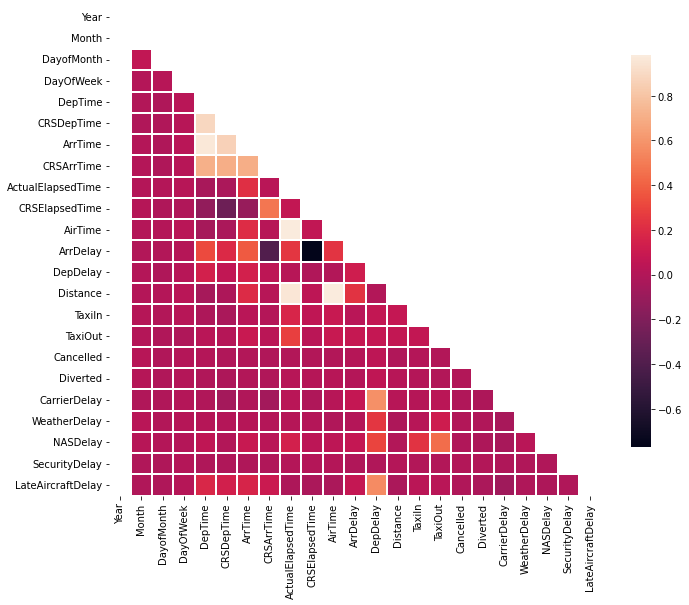

In [111]:
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# plot heatmap
sns.heatmap(df_corr, mask=mask, linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

We create a DF with the variables that seem more relevant, 2 Unique Carriers and 2 Airports to check if they have a good correlation

In [112]:
df_new_columns = df_sample[['DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'UniqueCarrier_NW', 'UniqueCarrier_UA', 'Origin_JFK', 'Origin_LAX', 'Dest_JFK', 'Dest_LAX']]

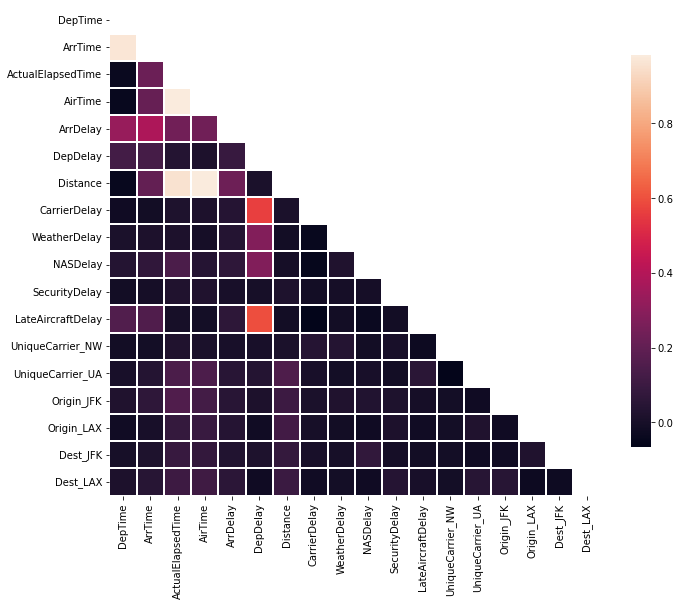

In [113]:
df_corr = df_new_columns.corr()
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# plot heatmap
sns.heatmap(df_corr, mask=mask, linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

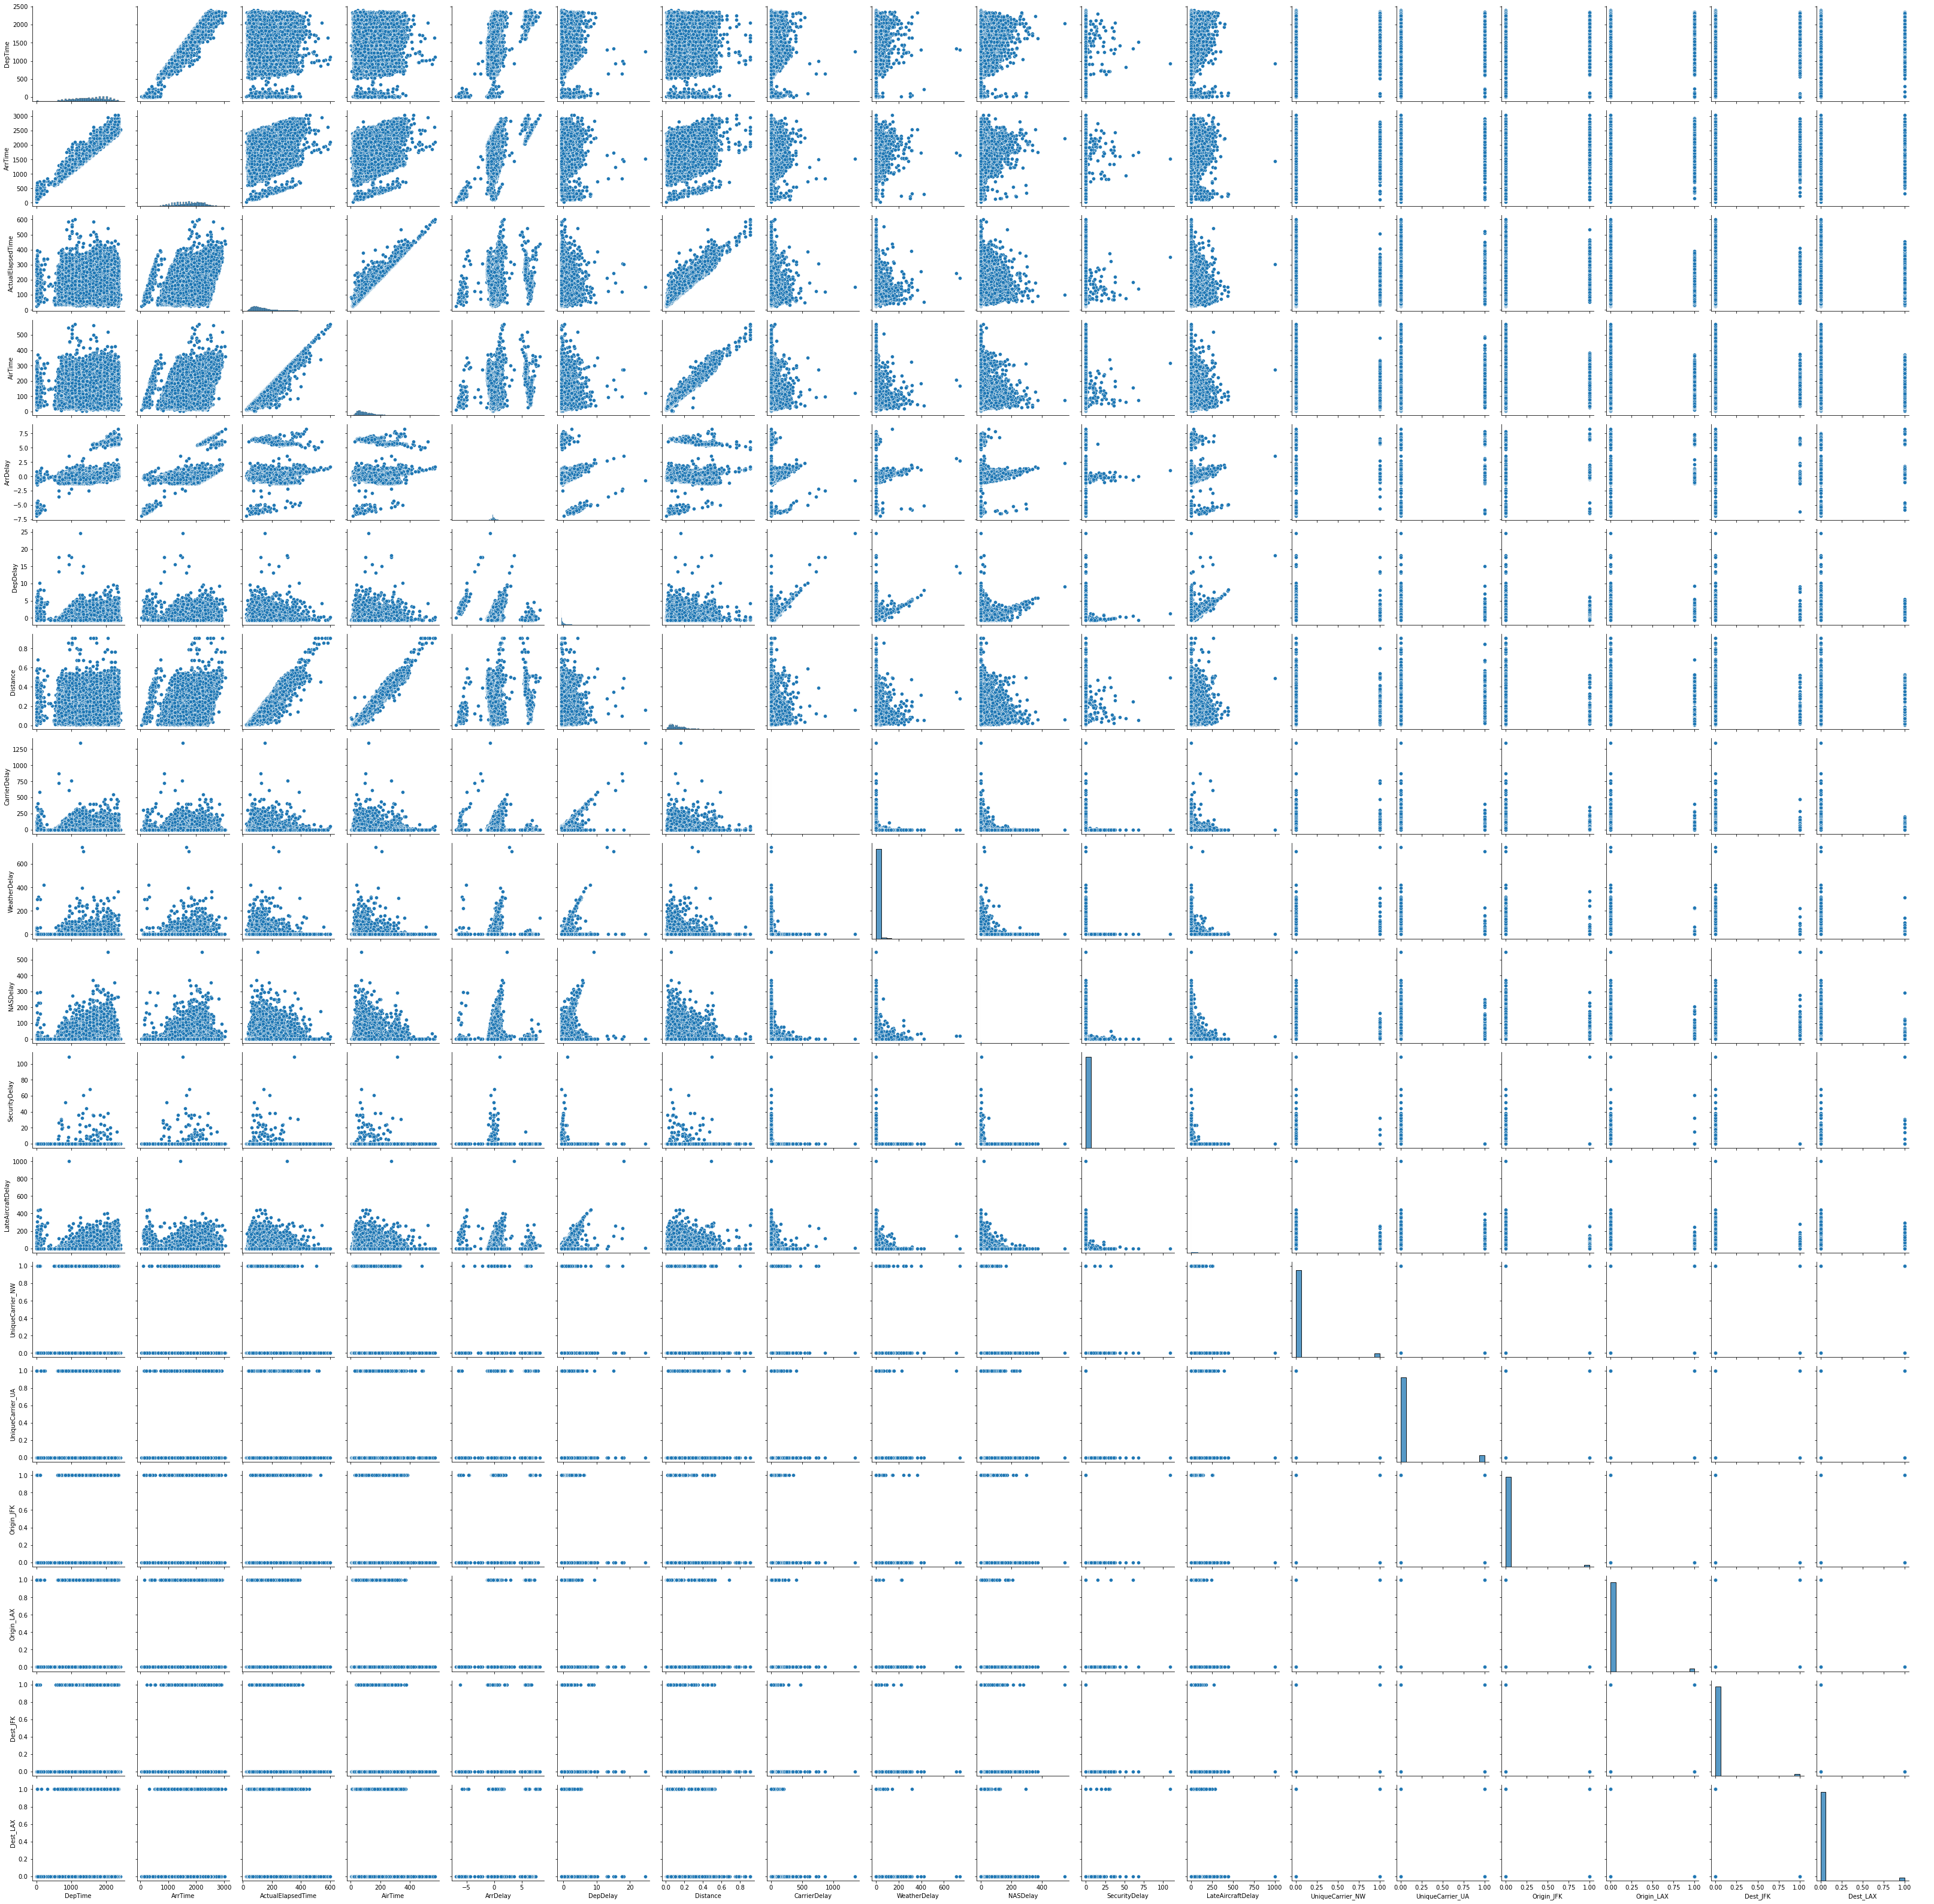

In [114]:
g = sns.PairGrid(df_new_columns)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

We notice that there is not a good correlation of the variables, but this can be because we are only using a sample of the complete dataframe and we didn´t filter for the airports and carriers that we selected, so we repeat the calculations first filtering the data. We now use the complete dataframe as the new filtered dataframe will be a reasonable size

In [115]:
df_some_new_columns = df2[['DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay'
                                 , 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'
                                 , 'LateAircraftDelay', 'UniqueCarrier_NW', 'UniqueCarrier_UA', 'Origin_JFK'
                                 , 'Origin_LAX', 'Dest_JFK', 'Dest_LAX']][(((df2['UniqueCarrier_NW']==1) | (df2['UniqueCarrier_UA']==1)) 
                                                                           & ((df2['Origin_JFK']==1) | (df2['Origin_LAX']==1)) 
                                                                           & ((df2['Dest_JFK']==1) | (df2['Dest_LAX']==1)))]
                                                                         

In [116]:
df_some_new_columns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1249.0,1524.048839,5.258858e+02,2.000000,1156.000000,1558.000000,1920.000000,2400.000000
ArrTime,1249.0,2104.539518,5.413993e+02,456.000000,1743.000000,2142.000000,2540.000000,3136.000000
ActualElapsedTime,1249.0,348.336956,4.413443e+01,241.000000,315.000000,343.000000,373.000000,679.000000
AirTime,1249.0,309.171356,2.731788e+01,225.000000,290.000000,307.000000,327.000000,405.000000
ArrDelay,1249.0,0.916995,2.277200e+00,-5.219598,-0.772759,0.547250,0.945126,7.620066
DepDelay,1249.0,0.303718,1.250621e+00,-0.696315,-0.546505,-0.171980,0.670701,6.756732
Distance,1249.0,0.497677,8.385541e-15,0.497677,0.497677,0.497677,0.497677,0.497677
CarrierDelay,1249.0,11.610088,3.380472e+01,0.000000,0.000000,0.000000,6.000000,325.000000
WeatherDelay,1249.0,0.829464,9.652150e+00,0.000000,0.000000,0.000000,0.000000,217.000000
NASDelay,1249.0,23.405925,5.091389e+01,0.000000,0.000000,0.000000,20.000000,417.000000


We have to note that the NW carrier do not have flights in between JKF and LAX airport and therefore all the flight in the new dataframe are from UA carrier. As we are only checking the flights in between 2 airports the distance is always the same. Finally we could see that there are no SecurityDelays.

So, we remove the columns with constant values.

In [117]:
df_some_new_columns = df_some_new_columns.drop(['SecurityDelay', 'UniqueCarrier_NW', 'UniqueCarrier_UA', 'Distance'], axis=1)
df_some_new_columns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1249.0,1524.048839,525.885828,2.000000,1156.000000,1558.00000,1920.000000,2400.000000
ArrTime,1249.0,2104.539518,541.399288,456.000000,1743.000000,2142.00000,2540.000000,3136.000000
ActualElapsedTime,1249.0,348.336956,44.134434,241.000000,315.000000,343.00000,373.000000,679.000000
AirTime,1249.0,309.171356,27.317877,225.000000,290.000000,307.00000,327.000000,405.000000
ArrDelay,1249.0,0.916995,2.277200,-5.219598,-0.772759,0.54725,0.945126,7.620066
DepDelay,1249.0,0.303718,1.250621,-0.696315,-0.546505,-0.17198,0.670701,6.756732
CarrierDelay,1249.0,11.610088,33.804717,0.000000,0.000000,0.00000,6.000000,325.000000
WeatherDelay,1249.0,0.829464,9.652150,0.000000,0.000000,0.00000,0.000000,217.000000
NASDelay,1249.0,23.405925,50.913885,0.000000,0.000000,0.00000,20.000000,417.000000
LateAircraftDelay,1249.0,20.655725,47.249169,0.000000,0.000000,0.00000,17.000000,356.000000


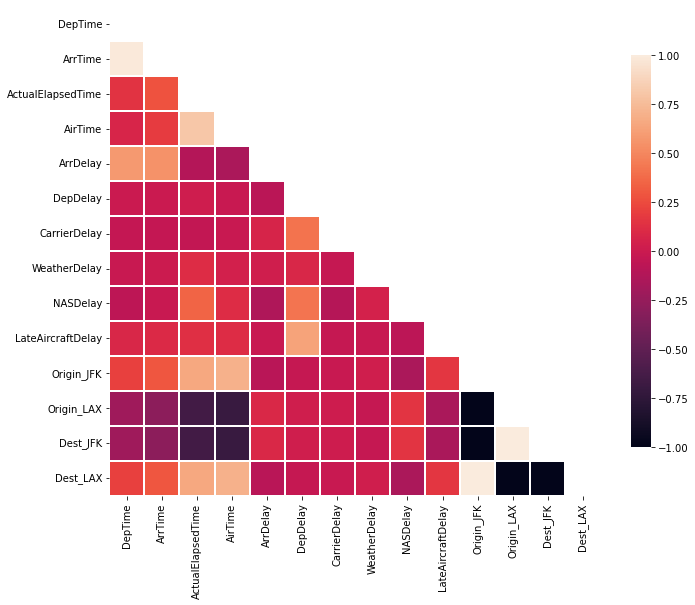

In [118]:
df_corr = df_some_new_columns.corr()

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# plot heatmap
sns.heatmap(df_corr, mask=mask, linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

In [119]:
df_corr

,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay,Origin_JFK,Origin_LAX,Dest_JFK,Dest_LAX
DepTime,1.000000,0.990480,0.144037,0.075248,0.582635,-0.005785,-0.032230,-0.014219,-0.063005,0.081630,0.206701,-0.206701,-0.206701,0.206701
ArrTime,0.990480,1.000000,0.275721,0.183371,0.551975,-0.002848,-0.036225,0.001988,-0.014470,0.095763,0.290464,-0.290464,-0.290464,0.290464
ActualElapsedTime,0.144037,0.275721,1.000000,0.806708,-0.115060,0.022464,-0.040026,0.111786,0.344275,0.127461,0.655750,-0.655750,-0.655750,0.655750
AirTime,0.075248,0.183371,0.806708,1.000000,-0.154079,-0.013959,-0.008081,0.039677,0.109646,0.116129,0.702860,-0.702860,-0.702860,0.702860
ArrDelay,0.582635,0.551975,-0.115060,-0.154079,1.000000,-0.082781,0.067396,0.030721,-0.136980,-0.012312,-0.087598,0.087598,0.087598,-0.087598
DepDelay,-0.005785,-0.002848,0.022464,-0.013959,-0.082781,1.000000,0.409149,0.084600,0.416773,0.629161,-0.029621,0.029621,0.029621,-0.029621
CarrierDelay,-0.032230,-0.036225,-0.040026,-0.008081,0.067396,0.409149,1.000000,-0.029538,-0.103934,-0.029529,-0.011982,0.011982,0.011982,-0.011982
WeatherDelay,-0.014219,0.001988,0.111786,0.039677,0.030721,0.084600,-0.029538,1.000000,0.050747,-0.018554,0.024330,-0.024330,-0.024330,0.024330
NASDelay,-0.063005,-0.014470,0.344275,0.109646,-0.136980,0.416773,-0.103934,0.050747,1.000000,-0.075207,-0.149272,0.149272,0.149272,-0.149272
LateAircraftDelay,0.081630,0.095763,0.127461,0.116129,-0.012312,0.629161,-0.029529,-0.018554,-0.075207,1.000000,0.158100,-0.158100,-0.158100,0.158100


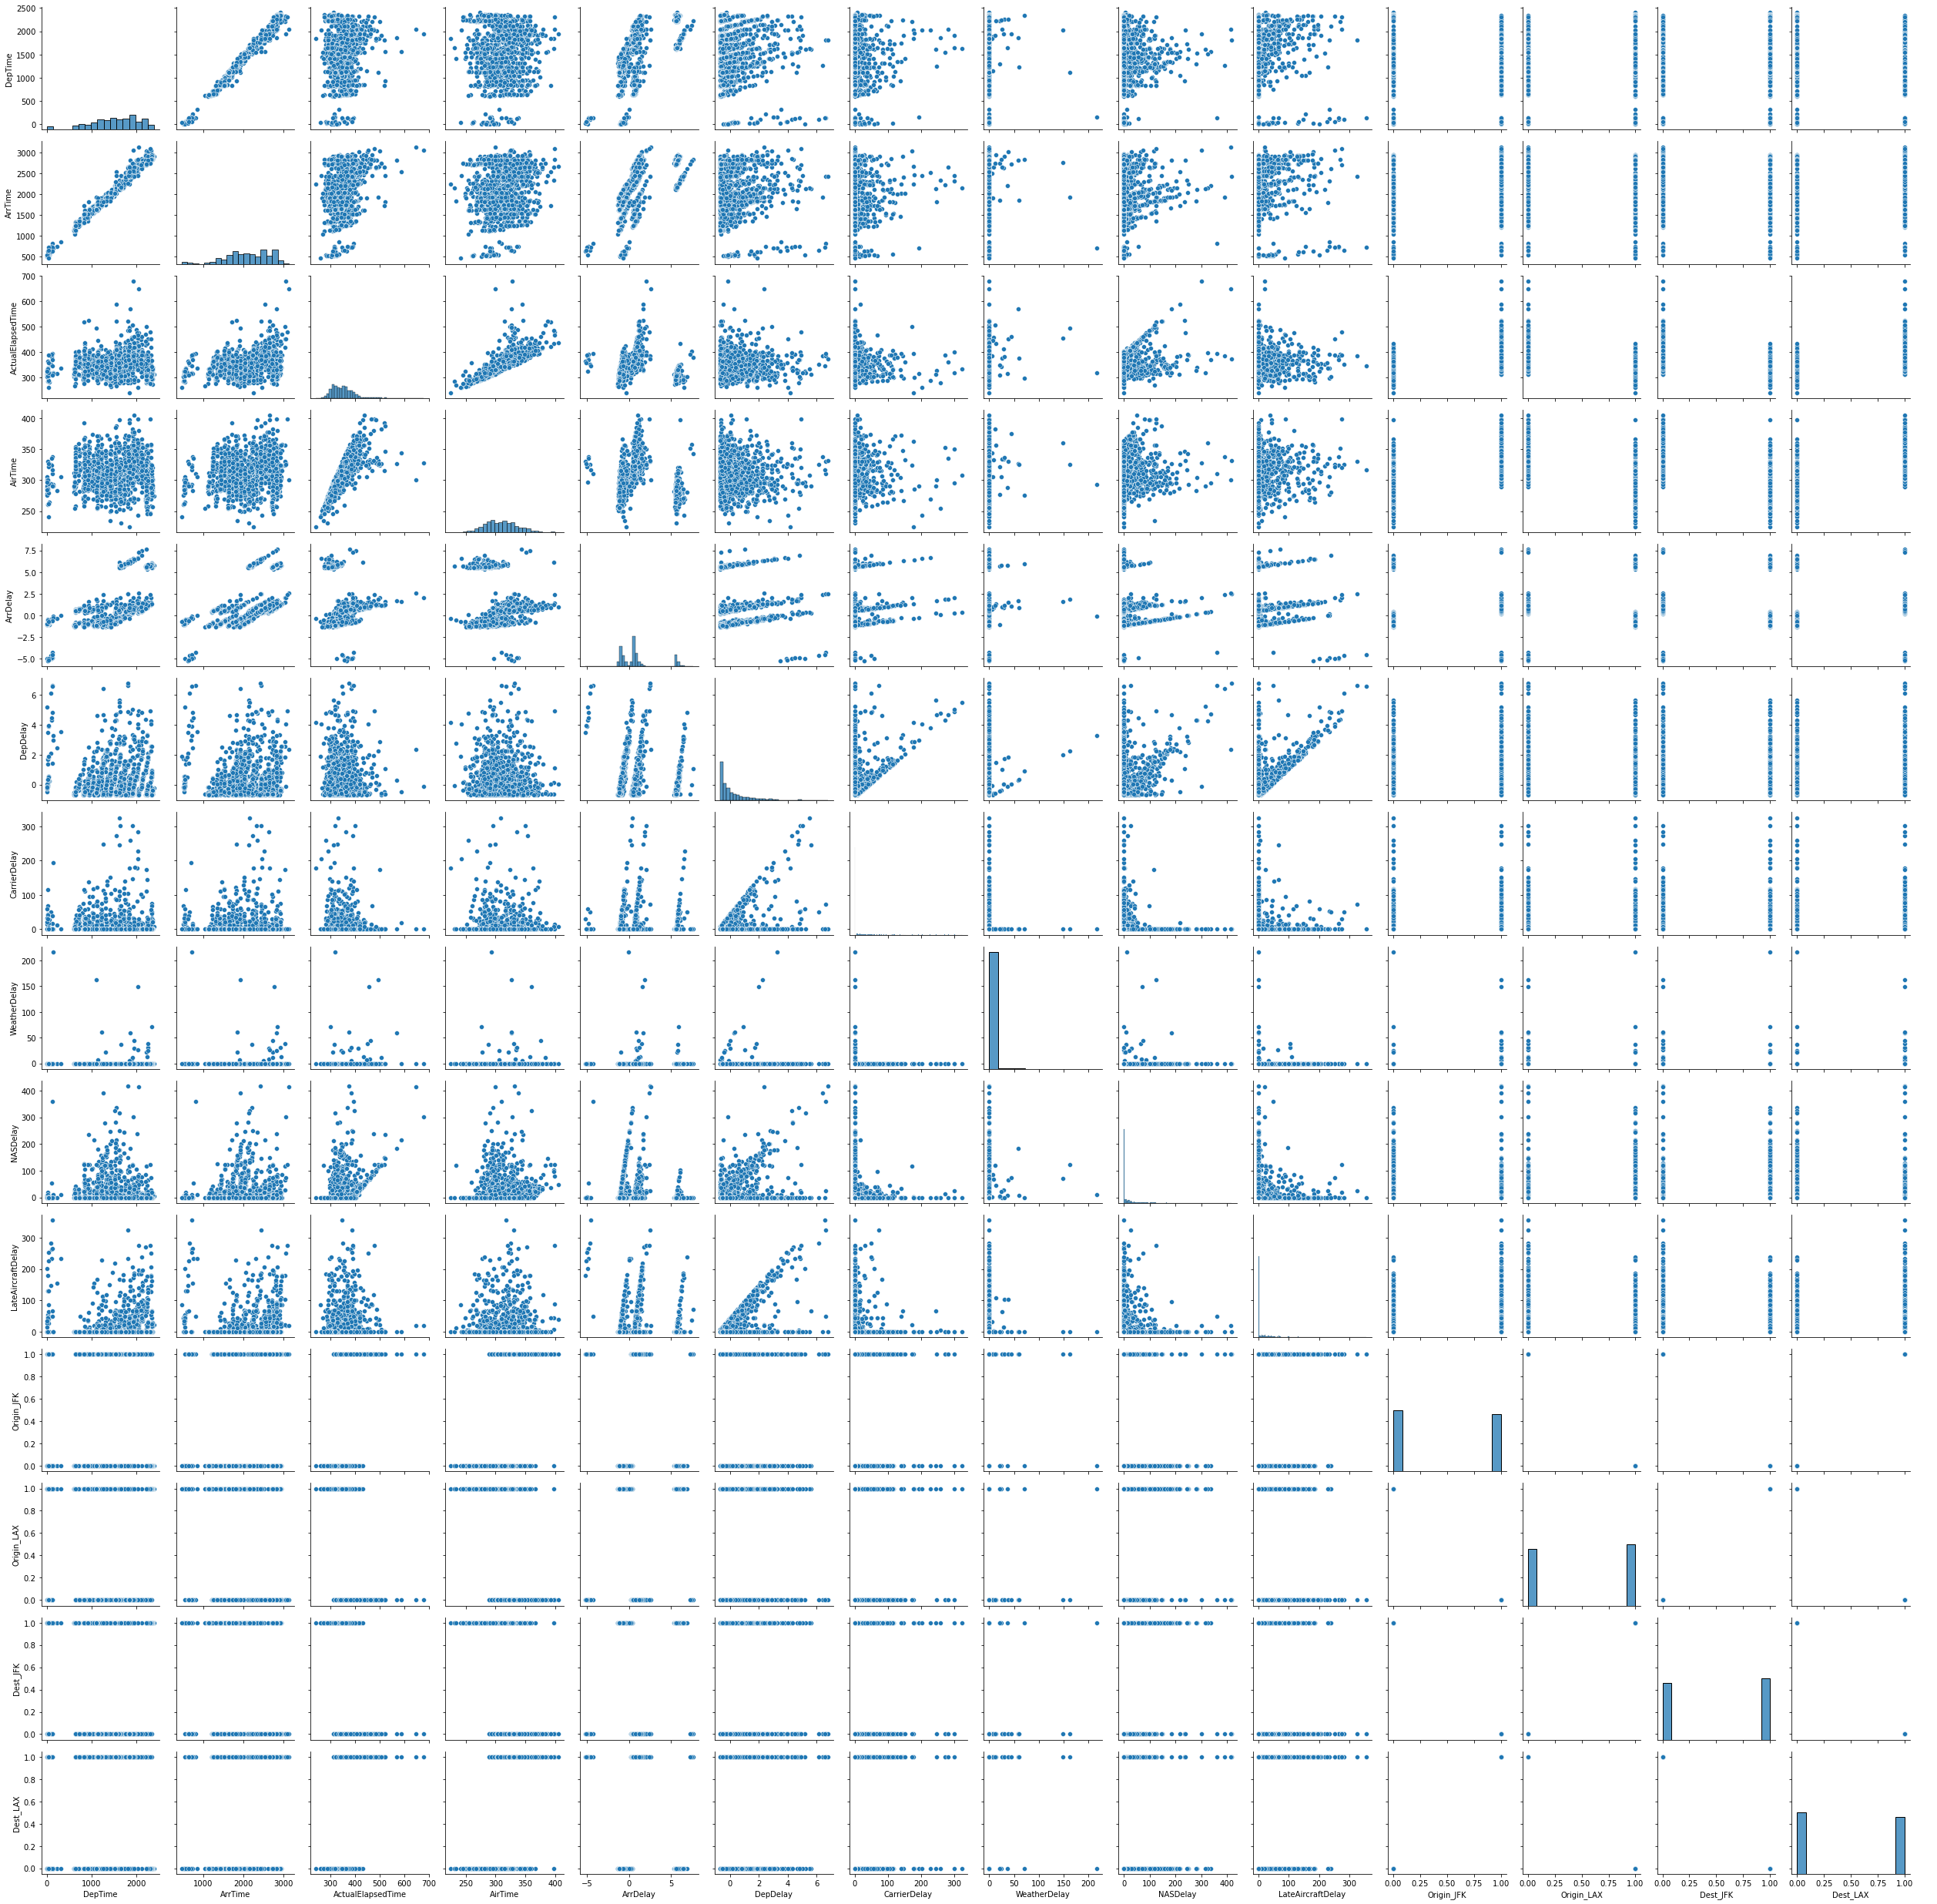

In [120]:
g = sns.PairGrid(df_some_new_columns)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

The conclusions are that the main causes for Arrival delays still being the Departure Delay and the Air Time for United Airlines on the JFK and LAX airports.